# Pertemuan 3 - Penguraian Keragaman dan Selang Kepercayaan

Pada pertemuan sebelumnya, kita sudah mempelajari perhitungan untuk mendapatkan nilai dugaan parameter $\beta_0$ dan $\beta_1$ dalam analisis regresi. Kali ini akan dilakukan pendalaman terkait penguraian keragaman dan selang kepercayaan nilai dugaan tersebut.

In [1]:
import numpy as np  
import pandas as pd  

# Membaca file CSV
data = pd.read_csv("C:/Users/faeri/OneDrive/Documents/Statistika/Asprak Anreg/Minggu 3/data liver.csv", sep=";")

# Mengakses kolom Y dan X1
y = data['Y']
x1 = data['X1']
n = len(data)

# Membuat DataFrame baru dengan kolom y dan x1
data = pd.DataFrame({'y': y, 'x1': x1})

# Menampilkan 5 baris pertama dari DataFrame
print(data.head())

        y     x1
0  158.76  16.36
1  197.19  26.68
2  144.73  12.49
3  140.06   8.45
4  129.71  10.19


In [2]:
#pip install sklearn
from sklearn.linear_model import LinearRegression

# Menyiapkan data untuk model regresi
X = x1.values.reshape(-1, 1)  # Mengubah bentuk menjadi 2D array

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X, y)

# Menampilkan summary model
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: 138.83264143113578
Coefficient: [2.10445979]


Berdasarkan perhitungan, didapat dugaan persamaan regresi linear sebagai berikut. Dugaan persamaan tersebut dapat pula disebut sebagai nilai harapan dari peubah respons $Y$.

$$\hat{E[Y]}=\hat{Y}=138,8326+2,1045X_1$$

# Penguraian Keragaman

Penguraian keragaman dugaan persamaan regresi linear dapat dilakukan terlebih dahulu secara eksploratif melalui visualisasi sebagai berikut. Dari *scatter plot* yang dihasilkan, dapat diamati dua persamaan garis, yaitu $\hat{Y}$ sebagai nilai harapan $Y$ sekaligus dugaan persamaan dan $\bar{Y}$ sebagai rata-rata dari seluruh nilai $Y_i$ yang ada.

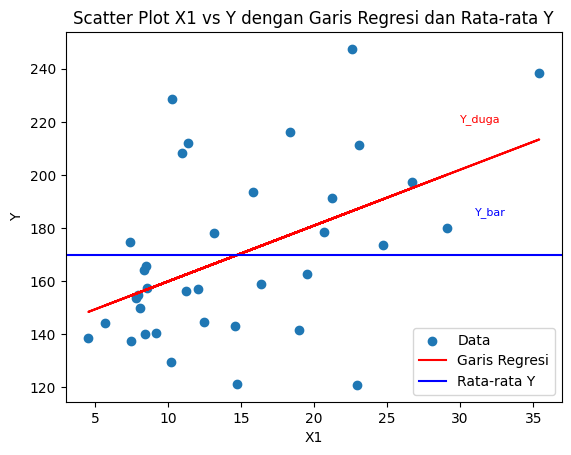

In [3]:
#pip install matplotlib
import matplotlib.pyplot as plt

# Menghitung rata-rata dari y
y_bar = np.mean(y)

# Membuat scatter plot
plt.scatter(x1, y, label='Data')

# Menambahkan garis regresi
plt.plot(x1, model.predict(X), color='red', label='Garis Regresi')

# Menambahkan anotasi untuk nilai Y_duga
plt.text(30, 220, "Y_duga", color='red', fontsize=8)

# Menambahkan garis rata-rata Y
plt.axhline(y=y_bar, color='blue', linestyle='-', label='Rata-rata Y')

# Menambahkan anotasi untuk nilai Y_bar
plt.text(31, 185, "Y_bar", color='blue', fontsize=8)

# Menambahkan label dan judul
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Scatter Plot X1 vs Y dengan Garis Regresi dan Rata-rata Y')
plt.legend()

# Menampilkan plot
plt.show()

Dari *scatter plot* di atas, teramati adanya amatan yang menyimpang relatif terhadap nilai harapannya. Penyimpangan amatan dari nilai harapannya inilah yang disebut sebagai *galat*. Keragaman dari galat tiap amatan ini dapat diurai berdasarkan garis dugaan persamaan ($\hat{Y}$) dan garis rataan nilai resposnya ($\bar{Y}$). Penguraian keragaman ini dapat dituliskan sebagai Jumlah Kuadrat Regresi (JKR), Jumlah Kuadrat Galat (JKG), dan Jumlah Kuadrat Total (JKT) dengan perhitungan sebagai berikut.

$$JKR=\sum_{i=1}^{n} (\hat{y_i}-\bar{y})^2; JKG=\sum_{i=1}^{n} (y_i-\hat{y_i})^2; JKT=\sum_{i=1}^{n} (y_i-\bar{y})^2$$

Hubungan antara ketiganya dapat pula dituliskan sebagai berikut.

$$JKT = JKR + JKG$$

Nilai penguraian k eragaman ini dapat diamati pula menggunakan fungsi `anova.lm()` pada bagian **Sum Sq**(**Jumlah Kuadrat**) seperti yang ditampilkan di bawah. Pada output sintaks di bawah, JKR model bernilai 8.501,9 dan JKG model bernilai 29.395,4.

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Menambahkan konstanta ke model (intercept)
x1 = sm.add_constant(x1)

# Membuat model regresi linier
model = ols('y ~ x1', data = data).fit()

# Melakukan analisis ANOVA
anova_model = sm.stats.anova_lm(model, typ=1)
print(anova_model)

            df        sum_sq      mean_sq         F    PR(>F)
x1         1.0   8501.938835  8501.938835  9.833715  0.003524
Residual  34.0  29395.393021   864.570383       NaN       NaN


Dari tabel ANOVA dan penguraian keragaman, dapat diduga pula **ragam galat/error** dari model yang kita peroleh. Secara umum, *error* dari model dapat diduga oleh nilai Kuadrat Tengah Galat (KTG) sehingga berdasarkan output sintaks di atas, diketahui bahwa ragam galat dari model bernilai 864,6. Hubungan antara keduanya dapat dituliskan sebagai berikut.

$$\hat{\sigma}^2=s_e^2=KTG=JKG/(n-2)$$

In [5]:
import numpy as np

# Menghitung Mean Square dari anova_model
KTG = anova_model['sum_sq'].iloc[1]/(anova_model['df'].iloc[1])
print(KTG)

864.5703829704701


Dari nilai dugaan ragam galat di atas, dapat diduga pula nilai dugaan dari simpangan bakunya. Dugaan simpangan baku inlah yang disebut **galat baku**. Hubungan antara galat baku dan ragam galat dapat dituliskan sebagai berikut.

$$s_e=\sqrt{s_e^2}$$

Oleh karena simpangan baku merupakan akar kuadrat dari ragam, maka nilai dugaan galat baku model yang kita bentuk adalah $s_e=\sqrt{864,6}\approx29,4$.

In [6]:
galat_baku = np.sqrt(KTG)
print(galat_baku)

29.403577723985734


# Keragaman Dugaan Parameter

## Dugaan Parameter β0

Sebelumnya, melalui fungsi `ols()` dan perhitungan manual yang sudah dibahas pada pertemuan sebelumnya, kita sudah mendapatkan nilai dugaan parameter $\beta_0$ dan $\beta_1$ sebesar 138.8326 dan 2.1045. Kedua nilai dugaan parameter tersebut dapat kita definisikan sebagai berikut.

In [7]:
# Mengambil koefisien dari model
b0, b1 = model.params

print(f"Koefisien b0: {b0}")
print(f"Koefisien b1: {b1}")

Koefisien b0: 138.8326414311358
Koefisien b1: 2.104459787464262


Selanjutnya kita dapat menghitung nilai **ragam** dan **t-hitung** dari dugaan parameter $\beta_0$ tersebut dengan perhitungan sebagai berikut.

$$s_{\hat{\beta_0}}=\sqrt{KTG(\frac{1}{n}+\frac{\bar{x}^2}{\sum_{i=1}^{n}(x_i-\bar{x})^2})};t_{hitung}=\frac{\hat{\beta_0}-\beta_0}{s_{\hat{\beta_0}}}$$

nilai $s_{\hat{\beta_0}}$ dapat dihitung dengan sintaks sebagai berikut.

In [8]:
se_b0 = se_b0 = model.bse.iloc[0]
print(se_b0)

11.003197756608051


Jika dalam uji hiptesis kita ingin menguji apakah $\beta_0=0$, maka nilai $t_{hitung}$ dapat dihitung sebagai berikut.

In [9]:
# Menghitung nilai t_hitung untuk b0
t_b0 = b0 / se_b0
print(t_b0)

12.617481254279816


## Dugaan Parameter β1

Sementara itu, ragam dan t-hitung dari dugaan parameter $\beta_1$ dapat diperoleh dadri perhitungan berikut.

$$s_{\hat{\beta_1}}=\sqrt{\frac{KTG}{\sum_{i=1}^{n}(x_i-\bar{x})^2}};t_{hitung}=\frac{\hat{\beta_1}-\beta_1}{s_{\hat{\beta_1}}}$$

Nilai $s_{\hat{\beta_1}}$ dapat dihitung dengan sintaks sebagai berikut.

In [10]:
# Menghitung standard error untuk b1
se_b1 = model.bse.iloc[1]
print(se_b1)

0.6710916273347742


Jika dalam uji hipotesis kita ingin menguji apakah $\beta_1=0$, maka nilai $t_{hitung}$ dapat dihitung sebagai berikut.

In [11]:
# Menghitung nilai t_hitung untuk b1
t_b1 = b1 / se_b1
print(t_b1)

3.135875492623978


## Selang Kepercayaan Parameter

Secara umum, kita dapat memehami bahwa selanag kepercayaan untuk $\hat{\beta_0}$ dan $\hat{\beta_1}$ terdiri atas batas bawah dan batas atas yang dapat dituliskan sebagai berikut.

$$\hat{\beta_0}-t_{(n-2;\frac{\alpha}{2})}s_{\hat{\beta_0}}<\hat{\beta_0}<\hat{\beta_0}+t_{(n-2;\frac{\alpha}{2})}s_{\hat{\beta_0}}$$
$$\hat{\beta_1}-t_{(n-2;\frac{\alpha}{2})}s_{\hat{\beta_1}}<\hat{\beta_1}<\hat{\beta_1}+t_{(n-2;\frac{\alpha}{2})}s_{\hat{\beta_1}}$$

Batas bawah dan atas untuk kedua dugaan parameter dalam taraf kepercayaan $\alpha=0.05$ dapat dihitung sebagai berikut.

In [13]:
from scipy import stats

alpha = 0.025  # Level signifikansi
t_value = abs(stats.t.ppf(alpha, df=n-2))  # Nilai t untuk interval kepercayaan

# Menghitung batas bawah untuk interval kepercayaan
bb_b0 = b0 - t_value * se_b0
bb_b1 = b1 - t_value * se_b1

# Menghitung batas atas untuk interval kepercayaan
ba_b0 = b0 + t_value * se_b0
ba_b1 = b1 + t_value * se_b1

print(f"{bb_b0}<b0<{ba_b0}")
print(f"{bb_b1}<b1<{ba_b1}")

116.47145320533205<b0<161.19382965693956
0.7406375125640743<b1<3.46828206236445


Sehingga dapat disusun suatu selang kepercayaan untuk $\hat{\beta_0}$ dan $\hat{\beta_1}$ sebagai berikut.

$$116.4715<\hat{\beta_0}<161.1938$$

Yang dapat dimaknai bahwa dalam taraf kepercayaan 95%, diyakini bahwa dugaan parameter $\hat{\beta_0}$ berada dalam selang 116.4715 hingga 161,1938

$$0.7406375<\hat{\beta_1}<3.468282$$

Yang dapat dimaknai bahwa dalam tarf kepercayaan 95%, diyakini bahwa dugaan parameter $\hat{\beta_1}$ berada dalam selang 0.7406375 hingga 3.468282.

# Selang Kepercayaan Rataan (Nilai Harapan) Amatan & Individu Amatan

Secara umum, kita dapat memahami bahwa selang kepercayaan untuk $E(\hat{Y}|x_0)$ terdiri atas batas bawah dan batas atas yang dapat dituliskan sebagai berikut.

$$E(\hat{Y}|x_0)\pm t_{(n-2;\frac{\alpha}{2})}s_e\sqrt{[\frac{1}{n}+\frac{(x_i-\bar{x})^2}{\sum_{i=1}^{n}(x_i-\bar{x})^2}]}$$

Kita juga dapat memahami bahwa selang kepercayaan untuk $\bar{y}(x_i)$ terdiri atas batas bawah dan batas atas yang dapat dituliskan sebagai berikut.

$$\hat{y}\pm t_{(n-2;\frac{\alpha}{2})}s_e\sqrt{[1+\frac{1}{n}+\frac{(x_i-\bar{x})^2}{\sum_{i=1}^{n}(x_i-\bar{x})^2}]}$$

Misalkan kita ingin menduga nilai rataan (harapan) amatan dan nilai individu amatan ketika nilai $x_1=12$. Kita dapat memanfaatkan fungsi `get_prediction()` untuk mendapatkan nilai dugaan dan selang kepercayaannya sebagai berikut.

In [14]:
# Melakukan prediksi dengan interval kepercayaan
amatan_diduga = pd.DataFrame({'const': 1, 'x1': [12]})
selang_kepercayaan = model.get_prediction(amatan_diduga).summary_frame(alpha=0.05)
print(selang_kepercayaan)

         mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  164.086159  5.220205     153.477426     174.694891    103.396487   

   obs_ci_upper  
0     224.77583  


Berdasarkan output sintaks di atas, diketahui bahwa dugaan rataan nilai $Y$ ketika nilai $x_1=12$ adalah $164,0862$. Selain itu, diindikasikan juga bahwa dalam taraf kepercayaan 95%, diyakini bahwa nilai dugaan rataan $Y$ ketika nilai $x_1=12$ berada dalam selang 153.4774 hingga 174.6949.

Diketahui pula bahwa dugaan nilai individu $Y$ ketika nilai $x_1=12$ adalah 164.0862. Selain itu, diindikasikan juga bahwa dalam taraf kepercayaan 95%, diyakini bahwa nilai amatan individu $Y$ ketika nilai $x_1=12$ berada dalam selang 103.3965 hingga 224.7758.